In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base=automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station=base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:

# Display the row's columns and data in dictionary format
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24e936066c8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [12]:
# Display the row's columns and data in dictionary format
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24e93613448>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

# Find Max Year of dataset using orderby descending
precip=session.query(measurement.date,measurement.prcp).\
    order_by(measurement.date.desc()).all()

precip

twelvemonths="2017"

# .order_by(model.Entry.amount.desc())

lastyear=session.query(measurement.date,measurement.prcp).\
    filter(func.strftime("%Y",measurement.date)==twelvemonths).all()

lastyear

# for row in session.query(measurement,measurement.date).\
#     filter(func.strftime("%Y",measurement.date)=="2017")
#     print(row)


# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
           
# Btw, instead of '1985-01-17', you can also use datetime.date(1985, 1, 17) - may be easier to get

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 (

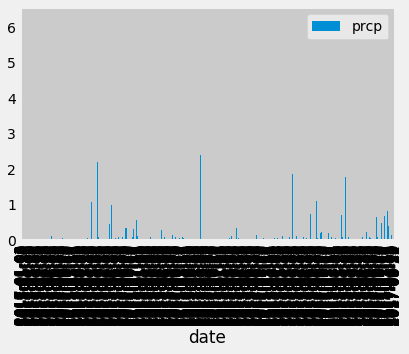

In [57]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(lastyear, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
# plt.tight_layout()
plt.show()


In [ ]:
# Sort the dataframe by date



In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
